In [1]:
from sklearn.datasets import load_digits
from sklearn.model_selection import cross_val_score

(data, target) = load_digits(return_X_y=True)
data.shape

(1797, 64)

In [2]:
from sklearn.tree import DecisionTreeClassifier

estimator = DecisionTreeClassifier()
score = cross_val_score(estimator, data, target, cv=10, n_jobs=-1).mean()

with open('1-answer-1.txt', 'w') as submission:
    submission.write(str(score))
score

0.8213661019872875

In [3]:
from sklearn.ensemble import BaggingClassifier

estimator = BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=100)
score = cross_val_score(estimator, data, target, cv=10, n_jobs=-1).mean()

with open('1-answer-2.txt', 'w') as submission:
    submission.write(str(score))
score

0.9270844299462183

In [4]:
estimator = BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=100, max_features=int(data.shape[1]**0.5))
score = cross_val_score(estimator, data, target, cv=10, n_jobs=-1).mean()

with open('1-answer-3.txt', 'w') as submission:
    submission.write(str(score))
score

0.9360632189406685

In [5]:
estimator = BaggingClassifier(base_estimator=DecisionTreeClassifier(max_features='sqrt'), n_estimators=100)
score = cross_val_score(estimator, data, target, cv=10, n_jobs=-1).mean()

with open('1-answer-4.txt', 'w') as submission:
    submission.write(str(score))
score

0.9544265193095971

In [6]:
from sklearn.ensemble import RandomForestClassifier

estimator = RandomForestClassifier(n_estimators=100, max_features='sqrt')
score = cross_val_score(estimator, data, target, cv=10, n_jobs=-1).mean()

score

0.9566813323652935

Populating the interactive namespace from numpy and matplotlib


array([[1.00000000e+00, 7.31785051e-01],
       [2.00000000e+00, 7.44265412e-01],
       [4.00000000e+00, 8.66401202e-01],
       [8.00000000e+00, 9.04433501e-01],
       [1.60000000e+01, 9.32745225e-01],
       [3.20000000e+01, 9.46056549e-01],
       [6.40000000e+01, 9.48933386e-01],
       [1.28000000e+02, 9.58351578e-01],
       [2.56000000e+02, 9.53927944e-01],
       [5.12000000e+02, 9.53380966e-01],
       [1.02400000e+03, 9.51070611e-01]])

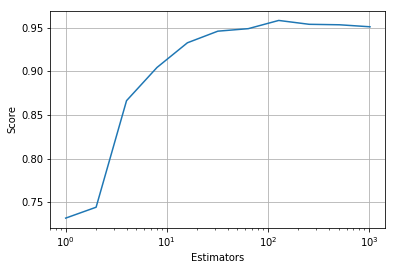

In [7]:
%pylab inline

n_estimators = 2**np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
scores = [cross_val_score(RandomForestClassifier(n_estimators=n, max_features='sqrt'), data, target, cv=10, n_jobs=-1).mean() for n in n_estimators]
pylab.axes(xscale='log', xlabel='Estimators', ylabel='Score')
pylab.grid(True)
pylab.plot(n_estimators, scores)
np.column_stack((n_estimators, scores))

array([[ 1.        ,  0.94604076],
       [ 2.        ,  0.95057622],
       [ 3.        ,  0.95389796],
       [ 4.        ,  0.95221856],
       [ 6.        ,  0.95453604],
       [ 8.        ,  0.9544562 ],
       [12.        ,  0.95441275],
       [16.        ,  0.9478003 ],
       [24.        ,  0.9472282 ],
       [32.        ,  0.9466463 ],
       [48.        ,  0.933305  ],
       [64.        ,  0.9254796 ]])

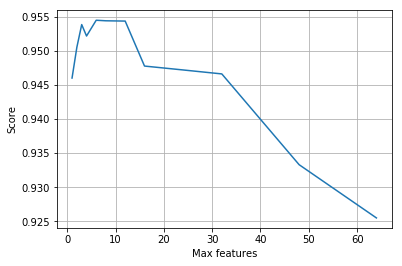

In [8]:
max_features = np.array([1, 2, 3, 4, 6, 8, 12, 16, 24, 32, 48, 64])
scores = [cross_val_score(RandomForestClassifier(n_estimators=100, max_features=n), data, target, cv=10, n_jobs=-1).mean() for n in max_features]
pylab.axes(xlabel='Max features', ylabel='Score')
pylab.grid(True)
pylab.plot(max_features, scores)
np.column_stack((max_features, scores))

array([[ 1.        ,  0.68260823],
       [ 2.        ,  0.79473959],
       [ 3.        ,  0.86079977],
       [ 4.        ,  0.87865551],
       [ 6.        ,  0.93090506],
       [ 8.        ,  0.94331214],
       [12.        ,  0.95332067],
       [16.        ,  0.95108816],
       [24.        ,  0.94989662],
       [32.        ,  0.94999305],
       [48.        ,  0.95442268],
       [64.        ,  0.95057862]])

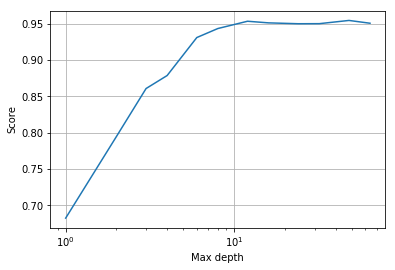

In [9]:
max_depth = np.array([1, 2, 3, 4, 6, 8, 12, 16, 24, 32, 48, 64])
scores = [cross_val_score(RandomForestClassifier(n_estimators=100, max_features='sqrt', max_depth=n), data, target, cv=10, n_jobs=-1).mean() for n in max_depth]
pylab.axes(xscale='log', xlabel='Max depth', ylabel='Score')
pylab.grid(True)
pylab.plot(max_features, scores)
np.column_stack((max_depth, scores))

In [10]:
with open('1-answer-5.txt', 'w') as submission:
    submission.write('2 3 4 7')